In [1]:
# Read in the data
stevens = read.csv("stevens.csv")
str(stevens)

# Split the data
library(caTools)
set.seed(3000)
spl = sample.split(stevens$Reverse, SplitRatio = 0.7)
Train = subset(stevens, spl==TRUE)
Test = subset(stevens, spl==FALSE)



'data.frame':	566 obs. of  9 variables:
 $ Docket    : Factor w/ 566 levels "00-1011","00-1045",..: 63 69 70 145 97 181 242 289 334 436 ...
 $ Term      : int  1994 1994 1994 1994 1995 1995 1996 1997 1997 1999 ...
 $ Circuit   : Factor w/ 13 levels "10th","11th",..: 4 11 7 3 9 11 13 11 12 2 ...
 $ Issue     : Factor w/ 11 levels "Attorneys","CivilRights",..: 5 5 5 5 9 5 5 5 5 3 ...
 $ Petitioner: Factor w/ 12 levels "AMERICAN.INDIAN",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Respondent: Factor w/ 12 levels "AMERICAN.INDIAN",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ LowerCourt: Factor w/ 2 levels "conser","liberal": 2 2 2 1 1 1 1 1 1 1 ...
 $ Unconst   : int  0 0 0 0 0 1 0 1 0 0 ...
 $ Reverse   : int  1 1 1 1 1 0 1 1 1 1 ...


In [6]:
# Install rpart library
library(rpart)


ERROR: Error in eval(expr, envir, enclos): could not find function "install"


ERROR: Error in library(rpart.plot): there is no package called ‘rpart.plot’


In [13]:
install.packages("rpart.plot", repos="http://cran.stat.ucla.edu/")


The downloaded source packages are in
	‘/private/var/folders/37/nz8s2zfd5j11_ck6wrwbhryr0000gn/T/Rtmpbaavew/downloaded_packages’


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [14]:
library(rpart.plot)

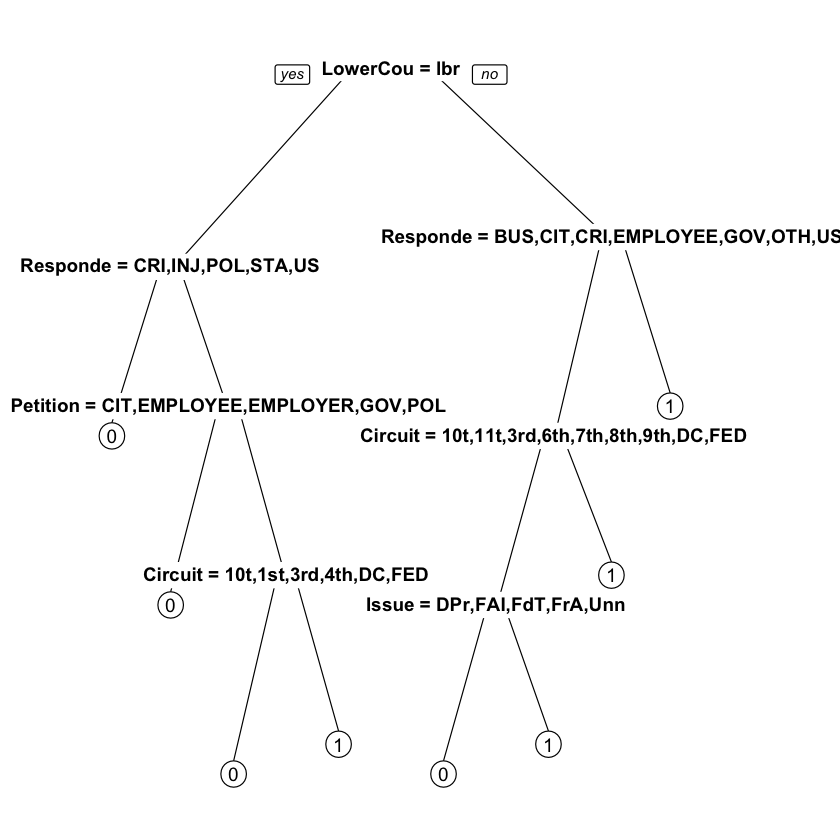

In [16]:
# CART model
StevensTree = rpart(Reverse ~ Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst, data = Train, method="class", minbucket=25)

prp(StevensTree)

In [17]:
# Make predictions
PredictCART = predict(StevensTree, newdata = Test, type = "class")
table(Test$Reverse, PredictCART)
(41+71)/(41+36+22+71)

   PredictCART
     0  1
  0 41 36
  1 22 71

[1] 0.6588235

In [18]:
# ROC curve
library(ROCR)

PredictROC = predict(StevensTree, newdata = Test)
PredictROC

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



,0,1
1,0.3035714,0.6964286
3,0.3035714,0.6964286
4,0.4,0.6
6,0.4,0.6
8,0.4,0.6
21,0.3035714,0.6964286
32,0.5517241,0.4482759
36,0.5517241,0.4482759
40,0.3035714,0.6964286
42,0.5517241,0.4482759


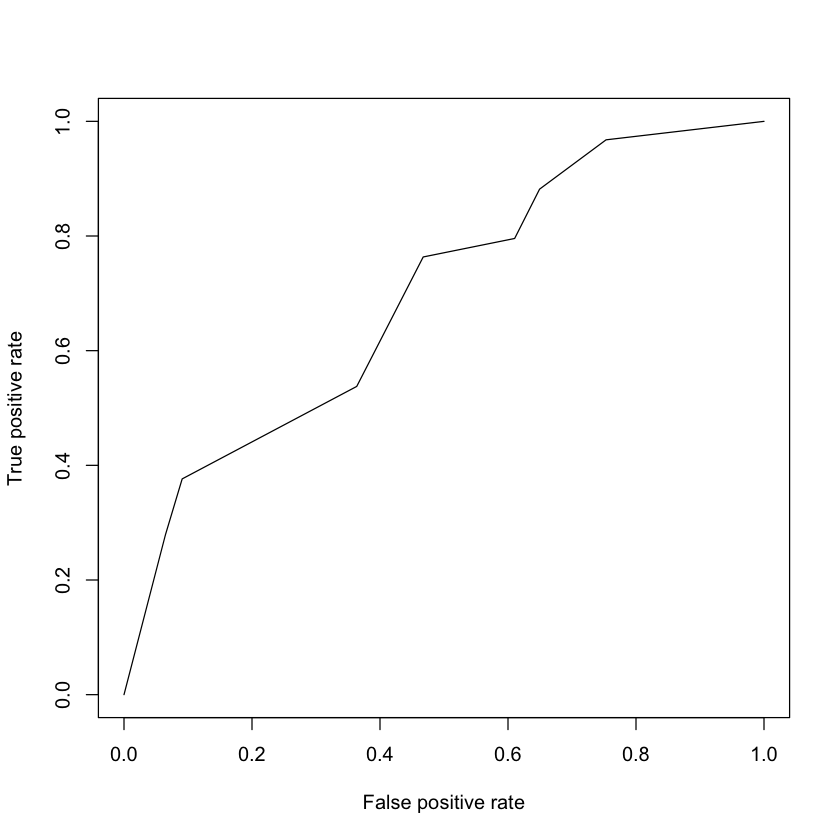

In [19]:

pred = prediction(PredictROC[,2], Test$Reverse)
perf = performance(pred, "tpr", "fpr")
plot(perf)


In [20]:
as.numeric(performance(pred, "auc")@y.values)

[1] 0.6927105

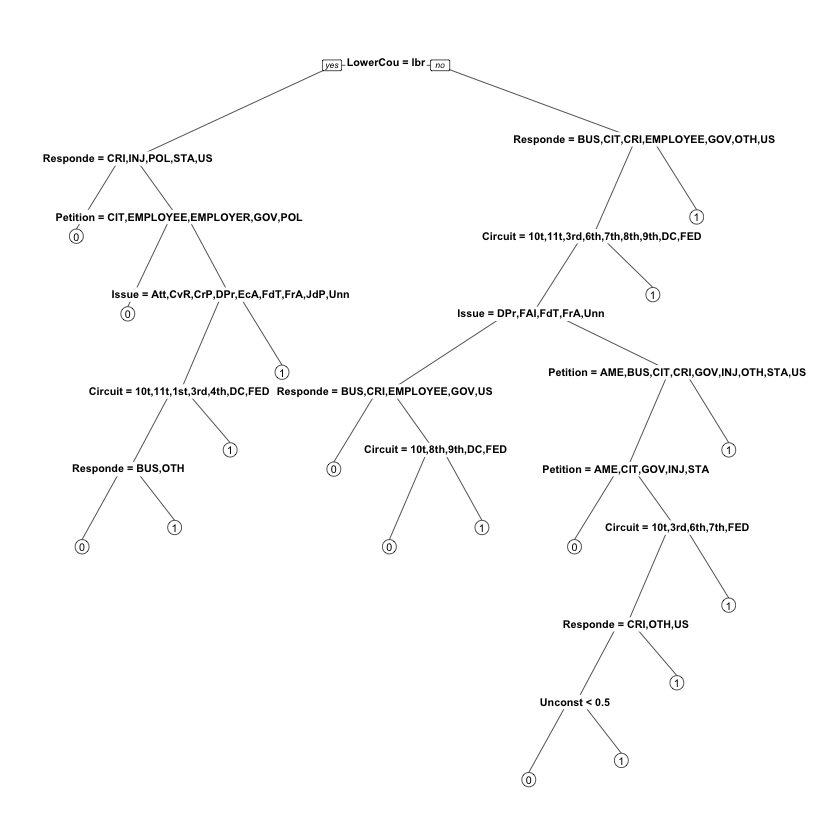

In [21]:
StevensTree5 = rpart(Reverse ~ Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst, data = Train, method="class", minbucket=5)

prp(StevensTree5)

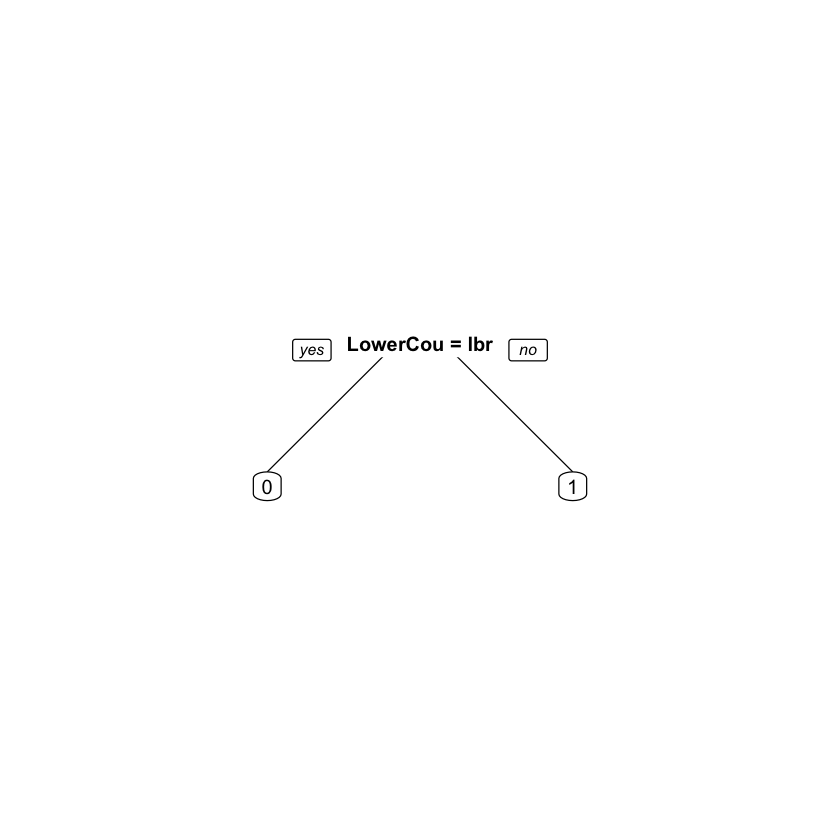

In [22]:
StevensTree100 = rpart(Reverse ~ Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst, data = Train, method="class", minbucket=100)

prp(StevensTree100)

# Random Forest

In [23]:
library(randomForest)


randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [24]:
# Build random forest model
StevensForest = randomForest(Reverse ~ Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst, data = Train, ntree=200, nodesize=25 )

Warning message:
In randomForest.default(m, y, ...): The response has five or fewer unique values.  Are you sure you want to do regression?

In [25]:
# Convert outcome to factor
Train$Reverse = as.factor(Train$Reverse)
Test$Reverse = as.factor(Test$Reverse)

# Try again
StevensForest = randomForest(Reverse ~ Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst, data = Train, ntree=200, nodesize=25 )

In [26]:
# Make predictions
PredictForest = predict(StevensForest, newdata = Test)
table(Test$Reverse, PredictForest)

   PredictForest
     0  1
  0 41 36
  1 17 76

In [32]:
(41+76)/(40+37+19+74)

[1] 0.6882353

In [30]:
set.seed(100)
# Make predictions
PredictForest = predict(StevensForest, newdata = Test)
table(Test$Reverse, PredictForest)

   PredictForest
     0  1
  0 41 36
  1 17 76

In [31]:
set.seed(200)
# Make predictions
PredictForest = predict(StevensForest, newdata = Test)
table(Test$Reverse, PredictForest)

   PredictForest
     0  1
  0 41 36
  1 17 76

# Video 6 - Cross validation

In [33]:
library(caret)
library(e1071)

Loading required package: lattice
Loading required package: ggplot2


In [34]:
numFolds = trainControl( method = "cv", number = 10 )

In [35]:
cpGrid = expand.grid( .cp = seq(0.01,0.5,0.01)) 

In [36]:
# Perform the cross validation
train(Reverse ~ Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst, data = Train, method = "rpart", trControl = numFolds, tuneGrid = cpGrid )


CART 

396 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 356, 356, 357, 357, 356, 357, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa        Accuracy SD  Kappa SD  
  0.01  0.6286538  0.230443882  0.098638390  0.21122556
  0.02  0.6285256  0.236971456  0.089716240  0.18980945
  0.03  0.6234615  0.230525584  0.084493459  0.17923829
  0.04  0.6234615  0.234943168  0.084493459  0.17745919
  0.05  0.6436538  0.282789665  0.083516373  0.16974849
  0.06  0.6436538  0.282789665  0.083516373  0.16974849
  0.07  0.6436538  0.282789665  0.083516373  0.16974849
  0.08  0.6436538  0.282789665  0.083516373  0.16974849
  0.09  0.6436538  0.282789665  0.083516373  0.16974849
  0.10  0.6436538  0.282789665  0.083516373  0.16974849
  0.11  0.6436538  0.282789665  0.083516373  0.16974849
  0.12  0.6436538  0.282789665  0.083516373  0.16974849
  0.13  0.6436538  0.282789665  0.083516373  0.16974

In [37]:
# Create a new CART model
StevensTreeCV = rpart(Reverse ~ Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst, data = Train, method="class", cp = 0.18)

In [38]:
# Make predictions
PredictCV = predict(StevensTreeCV, newdata = Test, type = "class")
table(Test$Reverse, PredictCV)

   PredictCV
     0  1
  0 59 18
  1 29 64

In [39]:
(59+64)/(59+18+29+64)

[1] 0.7235294

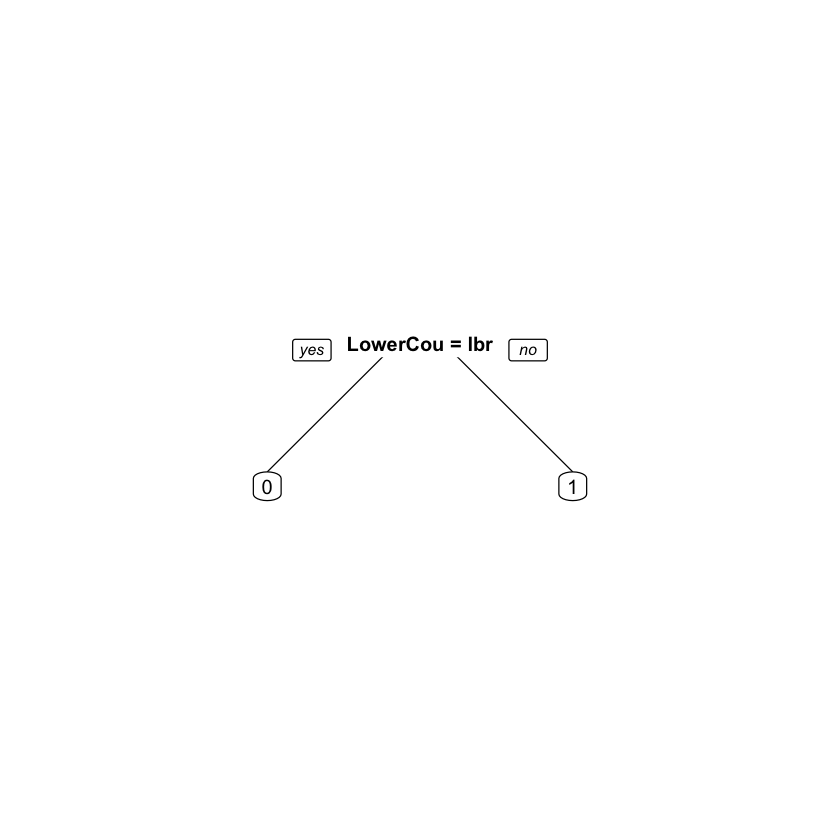

In [42]:
prp(StevensTreeCV)